### Understanding mixed distributions


The dataset named [*Old Faithful Geyser*](https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat) is a classic dataset describing the eruption times of the geysir found in the Upper Geyser Basin of Yellowstone National Park, which spans parts of Wyoming, Montana, and Idaho.

I was introduced to it first in the machine learning class during my studies.

The data describes two variables:

- Waiting time between eruptions 
- The duration of the eruption
- 272 observations 

Therefore it gives descriptive data that does not explain any how but what. A type of eruption

Live recording of the geysir can be found [here](https://www.nps.gov/yell/learn/photosmultimedia/webcams.htm#onthisPage-0).

*Note:* It is renowned for its predictability, erupting approximately every 60 to 110 minutes, and is considered one of the most reliable geysers in the world.

In [1]:
!curl -O https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6608  100  6608    0     0   8652      0 --:--:-- --:--:-- --:--:--  8649--:--:-- --:--:--     0


[[  1.      3.6    79.   ]
 [  2.      1.8    54.   ]
 [  3.      3.333  74.   ]
 [  4.      2.283  62.   ]
 [  5.      4.533  85.   ]
 [  6.      2.883  55.   ]
 [  7.      4.7    88.   ]
 [  8.      3.6    85.   ]
 [  9.      1.95   51.   ]
 [ 10.      4.35   85.   ]
 [ 11.      1.833  54.   ]
 [ 12.      3.917  84.   ]
 [ 13.      4.2    78.   ]
 [ 14.      1.75   47.   ]
 [ 15.      4.7    83.   ]
 [ 16.      2.167  52.   ]
 [ 17.      1.75   62.   ]
 [ 18.      4.8    84.   ]
 [ 19.      1.6    52.   ]
 [ 20.      4.25   79.   ]
 [ 21.      1.8    51.   ]
 [ 22.      1.75   47.   ]
 [ 23.      3.45   78.   ]
 [ 24.      3.067  69.   ]
 [ 25.      4.533  74.   ]
 [ 26.      3.6    83.   ]
 [ 27.      1.967  55.   ]
 [ 28.      4.083  76.   ]
 [ 29.      3.85   78.   ]
 [ 30.      4.433  79.   ]
 [ 31.      4.3    73.   ]
 [ 32.      4.467  77.   ]
 [ 33.      3.367  66.   ]
 [ 34.      4.033  80.   ]
 [ 35.      3.833  74.   ]
 [ 36.      2.017  52.   ]
 [ 37.      1.867  48.   ]
 

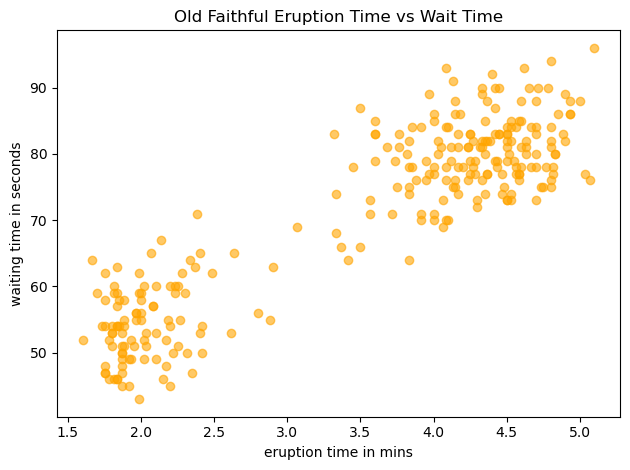

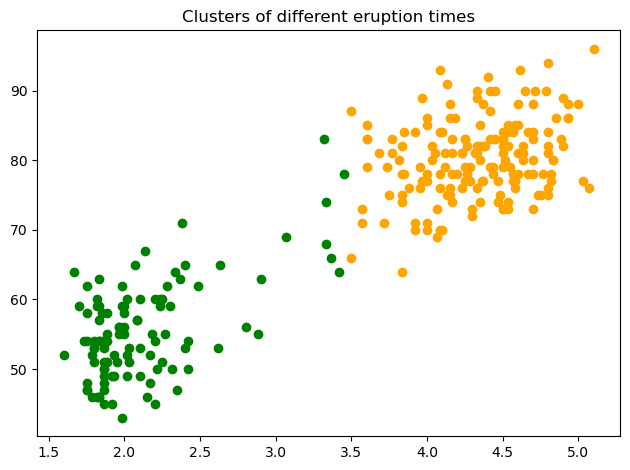

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the .dat file into a numpy array, erase the chars!
data = np.loadtxt('faithful.dat')

# Print the data to inspect it
print(data)

# If the .dat file has columns that you want to assign to specific variables
X = data[:, 1]  # First column
Y = data[:, 2]  # Second column

fig, ax = plt.subplots()

ax.scatter(X, Y, color='orange', alpha=0.6)
ax.set_ylabel('waiting time in seconds')
ax.set_xlabel('eruption time in mins')
ax.set_title('Old Faithful Eruption Time vs Wait Time')
plt.tight_layout()
plt.show()

df = pd.DataFrame({'X': X, 'Y': Y})

# visually 
condition = df.X >= df.X.mean()
df_left_cluster, df_right_cluster = df[condition], df[~condition]

fig, ax = plt.subplots()
ax.scatter(df_left_cluster.X, df_left_cluster.Y, color='orange')
ax.scatter(df_right_cluster.X, df_right_cluster.Y, color='green')
ax.set_title('Clusters of different eruption times')
plt.tight_layout()
plt.show()


In [4]:
# Now this was a simple eye-based split
# Let us use proper clustering to split the data

from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interact

# Function to perform K-means and plot the results
def plot_kmeans(k):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[['X', 'Y']])
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    
    # Plot each cluster with a unique color
    for i in range(k):
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data.X, cluster_data.Y, label=f'Cluster {i+1}')
    
    # Plot centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=200, label='Centroids')
    
    plt.title(f"K-Means Clustering with k={k}")
    plt.xlabel('eruption time')
    plt.ylabel('waiting time ')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive slider for k (with values 2, 3, 4, 5)
interact(plot_kmeans, k=widgets.IntSlider(value=2, min=2, max=5, step=1, description='Number of clusters (k):'))


interactive(children=(IntSlider(value=2, description='Number of clusters (k):', max=5, min=2), Output()), _dom…

<function __main__.plot_kmeans(k)>

/Users/inuit/miniconda3/envs/image_analysis_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/inuit/miniconda3/envs/image_analysis_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/inuit/miniconda3/envs/image_analysis_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


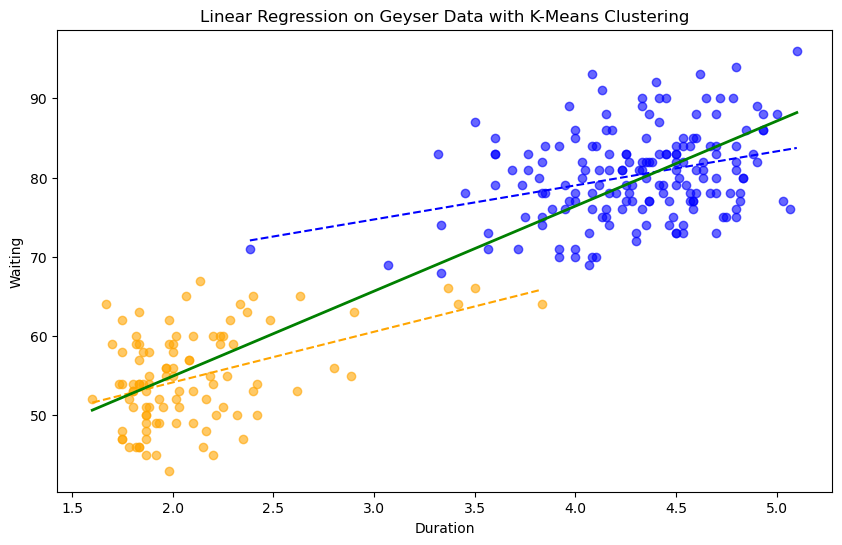

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs


# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['X', 'Y']])

# Fit a linear regression model for the whole dfset
lr_all = LinearRegression()
lr_all.fit(df[['X']], df['Y'])

# Fit a linear regression model for each cluster
cluster_models = {}
for cluster in df['Cluster'].unique():
    cluster_df = df[df['Cluster'] == cluster]
    lr_cluster = LinearRegression()
    lr_cluster.fit(cluster_df[['X']], cluster_df['Y'])
    cluster_models[cluster] = lr_cluster

# Plot the df and regression lines
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
for cluster, color in zip(df['Cluster'].unique(), colors):
    cluster_df = df[df['Cluster'] == cluster]
    plt.scatter(cluster_df['X'], cluster_df['Y'], color=color, label=f'Cluster {cluster}', alpha=0.6)
    # Regression line for the cluster
    x_vals = np.linspace(cluster_df['X'].min(), cluster_df['X'].max(), 100).reshape(-1, 1)
    y_vals = cluster_models[cluster].predict(x_vals)
    plt.plot(x_vals, y_vals, color=color, linestyle='--', label=f'Cluster {cluster} Regression')

# Overall regression line
x_vals_all = np.linspace(df['X'].min(), df['X'].max(), 100).reshape(-1, 1)
y_vals_all = lr_all.predict(x_vals_all)
plt.plot(x_vals_all, y_vals_all, color='green', label='Overall Regression', linewidth=2)

# Add labels and legend
plt.title('Linear Regression on Geyser Data with K-Means Clustering')
plt.xlabel('Duration')
plt.ylabel('Waiting')
plt.show();


What to make of this? Unfortunately, it is not obvious or trivial in any way.

The regression alines are much alike with a difference in offset of about 20 seconds waiting time. 

Perhaps a linear regression is too imprecise, perhaps having more data will distribute along the lines.  

A way of testing this hypothesis is by building a model of mixed distributions and simlulate eruption behaviour.

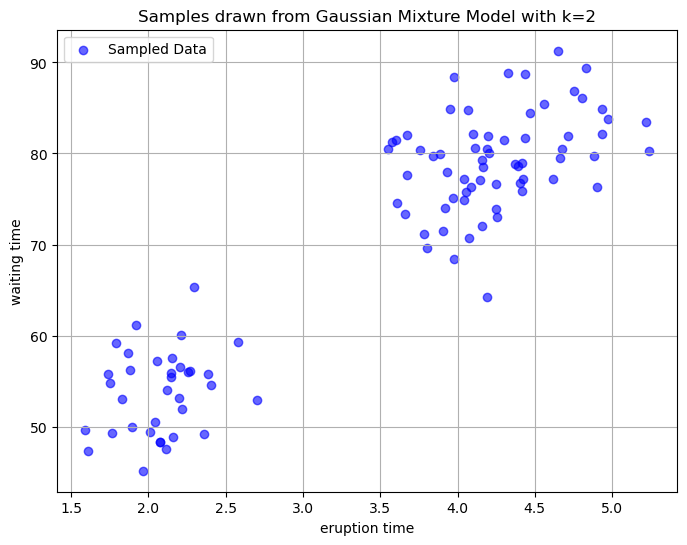

In [13]:
from sklearn.mixture import GaussianMixture

def fit_gmm_and_sample(k, n):
    # Extract the data
    X_data = df[['X', 'Y']].values
    
    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_data)
    
    # Draw samples from the fitted Gaussian Mixture Model
    samples, _ = gmm.sample(n)
    
    # Plot the sampled data
    plt.figure(figsize=(8, 6))
    plt.scatter(samples[:, 0], samples[:, 1], color='blue', alpha=0.6, label='Sampled Data')
    plt.title(f'Samples drawn from Gaussian Mixture Model with k={k}')
    plt.xlabel('eruption time')
    plt.ylabel('waiting time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
fit_gmm_and_sample(k=2, n=100)


In [14]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def fit_gmm_and_sample(k, n):
    # Extract the data
    X_data = df[['X', 'Y']].values
    
    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_data)
    
    # Draw samples from the fitted Gaussian Mixture Model
    samples, _ = gmm.sample(n)
    
    # Plot the sampled data
    plt.figure(figsize=(8, 6))
    plt.scatter(samples[:, 0], samples[:, 1], color='blue', alpha=0.6, label='Sampled Data')
    plt.title(f'Samples drawn from Gaussian Mixture Model with k={k}')
    plt.xlabel('eruption time')
    plt.ylabel('waiting time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders for k and n
interact(fit_gmm_and_sample, 
         k=widgets.IntSlider(value=1, min=1, max=7, step=1, description='Number of components (k):'),
         n=widgets.IntSlider(value=1, min=0, max=1000, step=1, description='Number of samples (n):'))


interactive(children=(IntSlider(value=1, description='Number of components (k):', max=7, min=1), IntSlider(val…

<function __main__.fit_gmm_and_sample(k, n)>

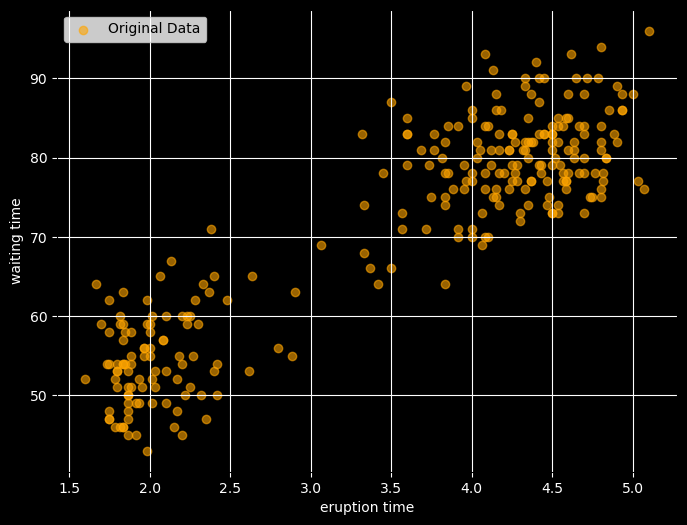

interactive(children=(IntSlider(value=1, description='Number of components (k):', max=7, min=1), IntSlider(val…

<function __main__.fit_gmm_and_sample(k, n)>

In [15]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def fit_gmm_and_sample(k, n):
    # Extract the data
    X_data = df[['X', 'Y']].values
    
    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_data)
    
    # Draw samples from the fitted Gaussian Mixture Model
    samples, _ = gmm.sample(n)
    
    # Plot the sampled data
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    ax.scatter(samples[:, 0], samples[:, 1], color='blue', alpha=0.6, label='Sampled Data')
    ax.set_title(f'Samples drawn from Gaussian Mixture Model with k={k}', color='white')
    ax.set_xlabel('eruption time', color='white')
    ax.set_ylabel('waiting time', color='white')
    ax.legend()
    ax.grid(True, color='white')
    ax.tick_params(colors='white')
    plt.show()

# Plot the original data distribution in orange for comparison
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.scatter(df['X'], df['Y'], color='orange', alpha=0.6, label='Original Data')
ax.set_xlabel('eruption time', color='white')
ax.set_ylabel('waiting time', color='white')
ax.legend()
ax.grid(True, color='white')
ax.tick_params(colors='white')
plt.show()

# Create interactive sliders for k and n
interact(fit_gmm_and_sample, 
         k=widgets.IntSlider(value=1, min=1, max=7, step=1, description='Number of components (k):'),
         n=widgets.IntSlider(value=1, min=0, max=1000, step=1, description='Number of samples (n):'))

Calculation completed in 9.99 seconds
   Number of Components (k)  Average BIC  Average AIC
0                         1   585.281839   572.255988
1                         2   607.105960   578.449087
2                         3   625.789281   581.501388
3                         4   648.536213   588.617298
4                         5   663.440187   587.890252
5                         6   678.587109   587.406152
6                         7   697.054414   590.242437
7                         8   713.082651   590.639652
8                         9   725.815536   587.741516
9                        10   735.222761   581.517720


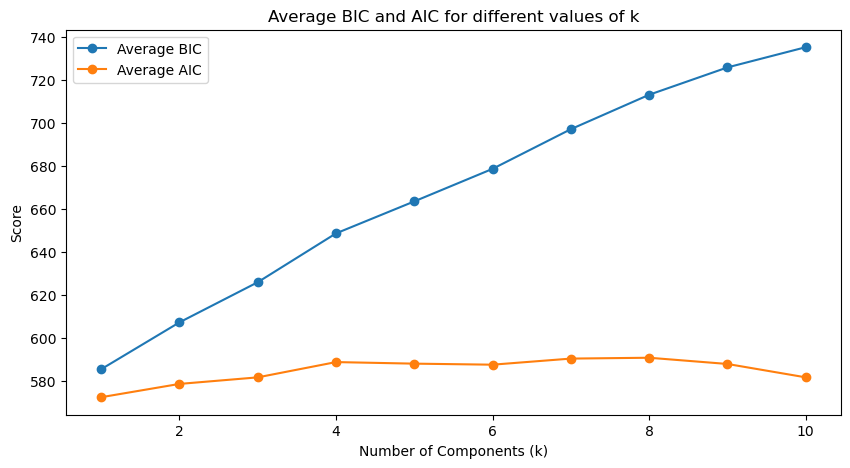

In [16]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Load the dataset
df = pd.read_csv('../data/faithful.csv')
X = df[['X', 'Y']].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate BIC and AIC scores
def calculate_bic_aic(X, max_components=10, iterations=100):
    bic_scores = np.zeros((max_components, iterations))
    aic_scores = np.zeros((max_components, iterations))
    
    for k in range(1, max_components + 1):
        for i in range(iterations):
            gmm = GaussianMixture(n_components=k, random_state=i)
            gmm.fit(X)
            bic_scores[k-1, i] = gmm.bic(X)
            aic_scores[k-1, i] = gmm.aic(X)
    
    avg_bic_scores = bic_scores.mean(axis=1)
    avg_aic_scores = aic_scores.mean(axis=1)
    
    return avg_bic_scores, avg_aic_scores

# Calculate BIC and AIC scores
start_time = time.time()
max_components = 10
iterations = 100
avg_bic_scores, avg_aic_scores = calculate_bic_aic(X_scaled, max_components, iterations)
end_time = time.time()

# Display the results in a table
results = pd.DataFrame({
    'Number of Components (k)': range(1, max_components + 1),
    'Average BIC': avg_bic_scores,
    'Average AIC': avg_aic_scores
})

print(f"Calculation completed in {end_time - start_time:.2f} seconds")
print(results)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(results['Number of Components (k)'], results['Average BIC'], label='Average BIC', marker='o')
plt.plot(results['Number of Components (k)'], results['Average AIC'], label='Average AIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.title('Average BIC and AIC for different values of k')
plt.legend()
plt.show()